In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Understand data frame


In [28]:
df.shape

(569, 33)

In [29]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df.duplicated().sum()

0

In [32]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Data preprocesing

In [33]:
df.drop(["id","Unnamed: 32"], axis = 1, inplace = True) 

In [34]:
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

_remove outliers

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

,count_out
diagnosis,0
radius_mean,14
texture_mean,7
perimeter_mean,13
area_mean,25
smoothness_mean,6
compactness_mean,16
concavity_mean,18
concave points_mean,10
symmetry_mean,15


Remove outliers

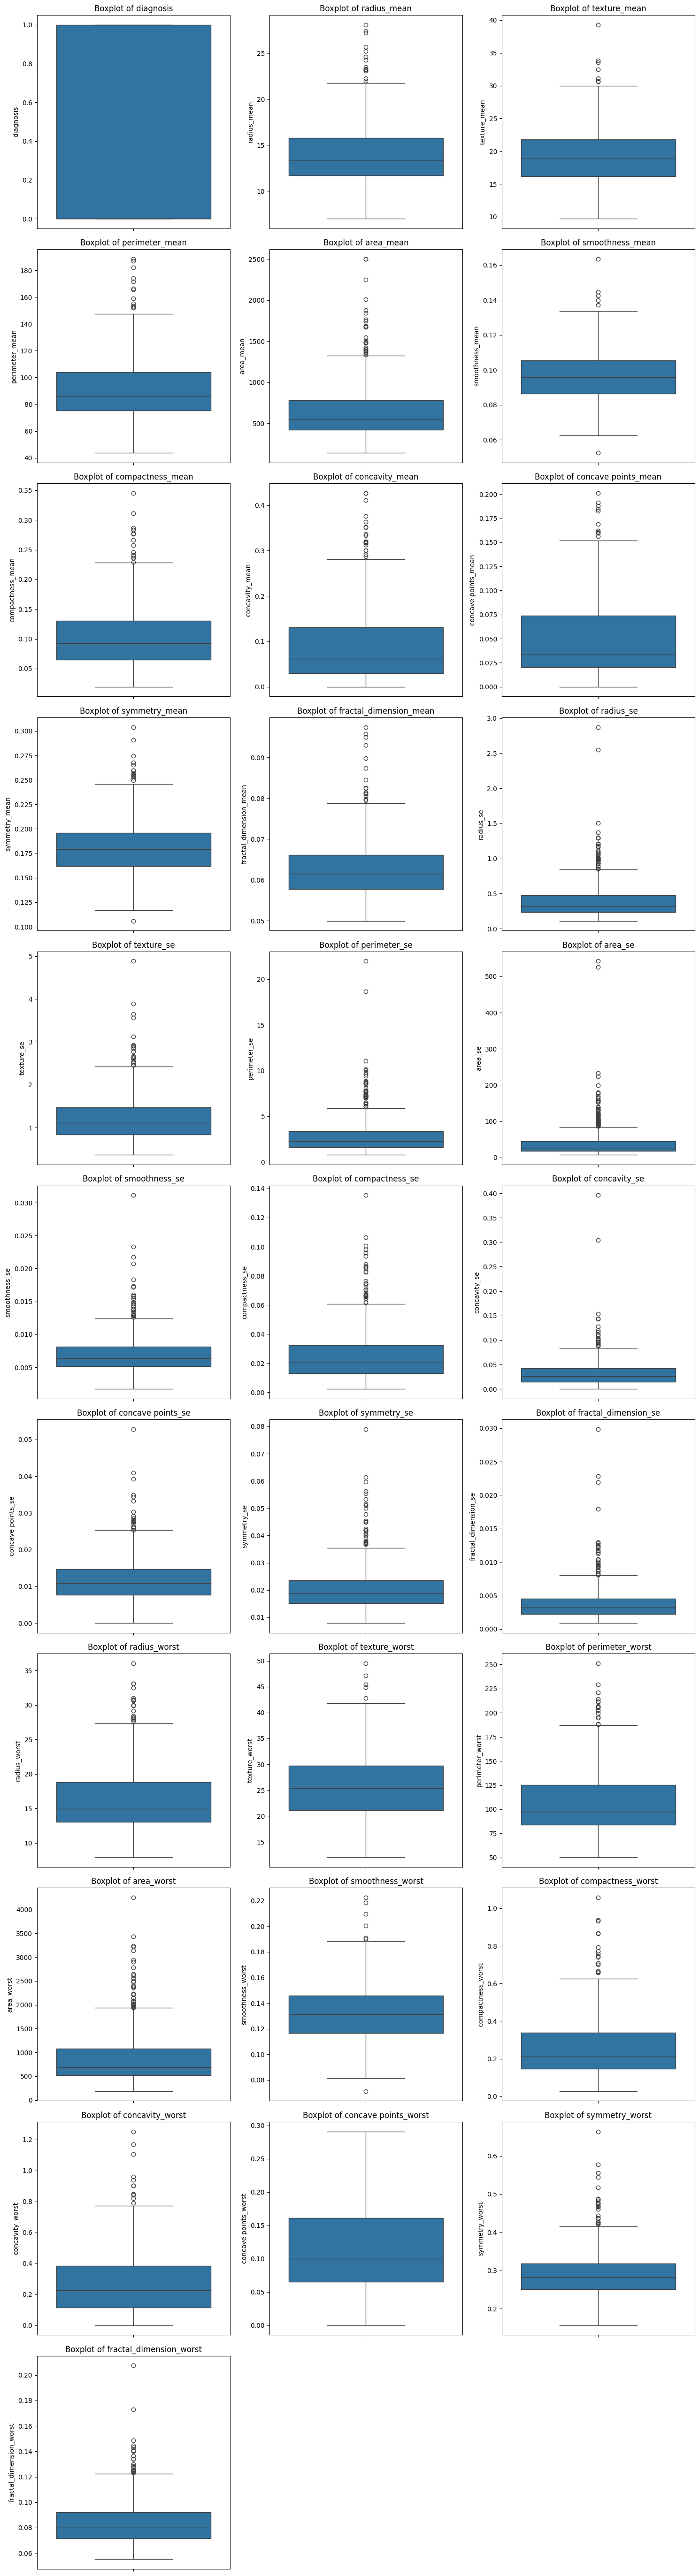

In [36]:
numeric_columns = df.select_dtypes(include='number').columns

num_cols = 3  
num_rows = -(-len(numeric_columns) // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() 

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])  
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [37]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
df = df[(df['radius_mean']<26)]
df = df[(df['texture_mean']<35)]
df = df[(df['perimeter_mean']<180)]
df = df[(df['area_mean']<2000)]
df = df[(df['smoothness_mean']<0.15)]
df = df[(df['compactness_mean']<0.30)]
df = df[(df['concavity_mean']<0.3)]
#df = df[(df['concave points_mean']<0.19)]
df = df[(df['symmetry_mean']<0.275)]
#df = df[(df['fractal_dimension_mean']<30)]
df = df[(df['radius_se']<2)]
df = df[(df['texture_se']<4)]
df = df[(df['perimeter_se']<15)]
df = df[(df['area_se']<300)]
df = df[(df['smoothness_se']<0.025)]
df = df[(df['compactness_se']<0.12)]
df = df[(df['concavity_se']<0.2)]
df = df[(df['concave points_se']<0.045)]
df = df[(df['symmetry_se']<0.07)]
df = df[(df['fractal_dimension_se']<0.015)]
df = df[(df['radius_worst']<34)]
df = df[(df['texture_worst']<49)]
df = df[(df['perimeter_worst']<240)]
df = df[(df['area_worst']<3500)]
#df = df[(df['smoothness_worst']<1)]
df = df[(df['compactness_worst']<1)]
df = df[(df['concavity_worst']<1)]
#df = df[(df['concave points_worst']<0.6)]
df = df[(df['symmetry_worst']<0.6)]
df = df[(df['fractal_dimension_worst']<0.16)]
df.shape

(539, 31)

EDA

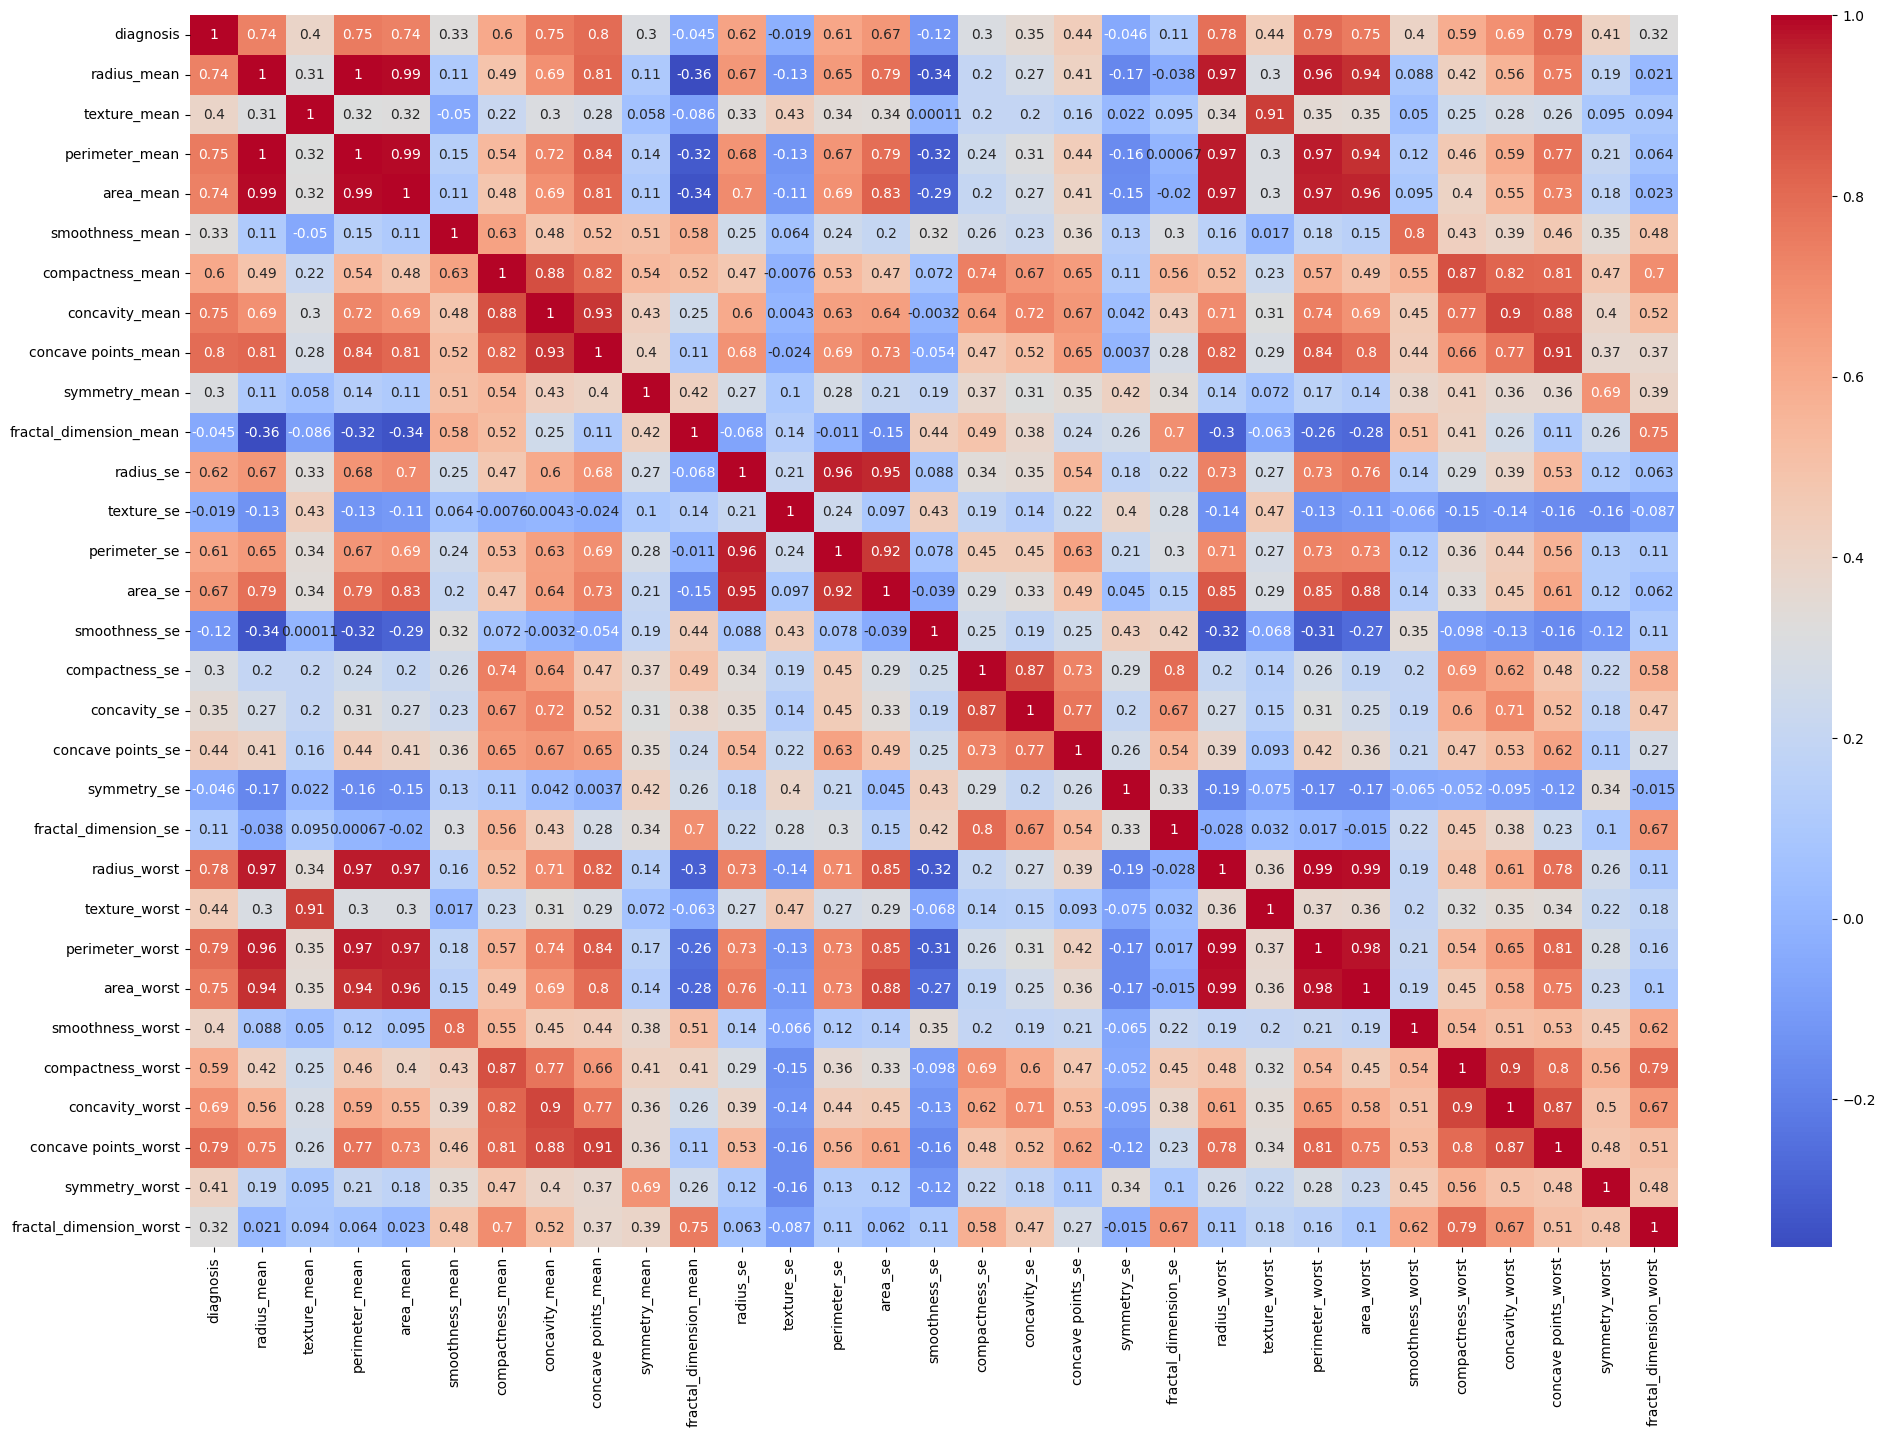

In [39]:
plt.figure(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

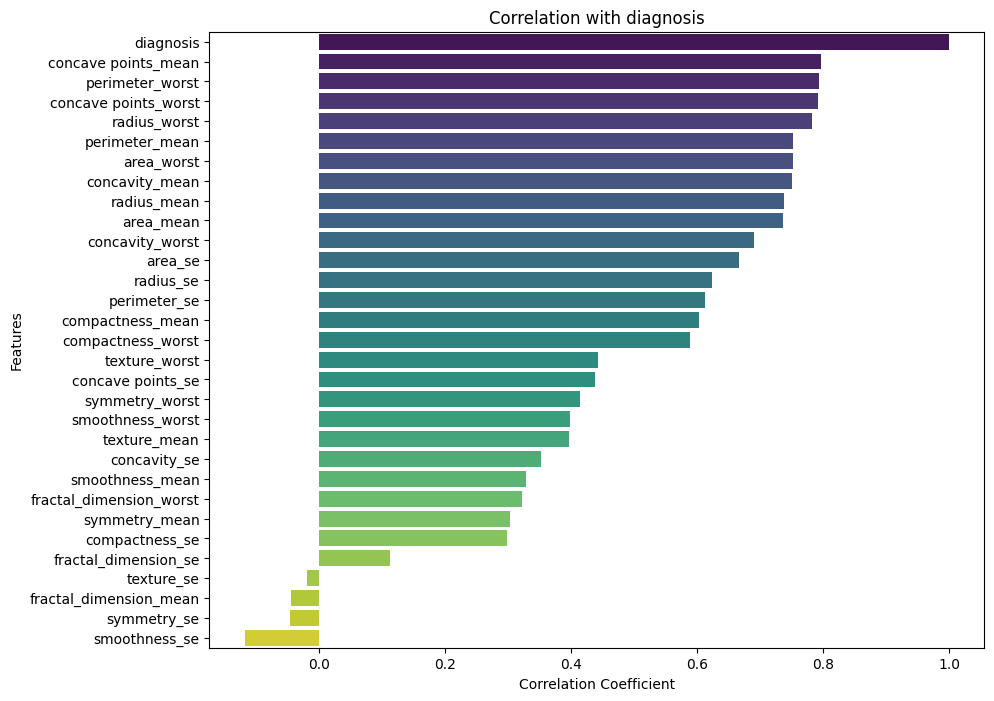

In [40]:
correlation = df.corr(numeric_only=True)[['diagnosis']].sort_values('diagnosis', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='diagnosis', 
    y=correlation.index, 
    data=correlation, 
    hue=correlation.index,  
    palette='viridis', 
    legend=False  
)
plt.title('Correlation with diagnosis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Feature Eng(remove similar features)

_radius_mean

In [41]:
df.drop(['perimeter_mean'], axis=1, inplace=True)
df.drop(['area_mean'], axis=1, inplace=True)
df.drop(['radius_worst'], axis=1, inplace=True)
df.drop(['perimeter_worst'], axis=1, inplace=True)
df.drop(['area_worst'], axis=1, inplace=True)

_texture_mean

In [42]:
df.drop(['texture_worst'], axis=1, inplace=True)

In [43]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

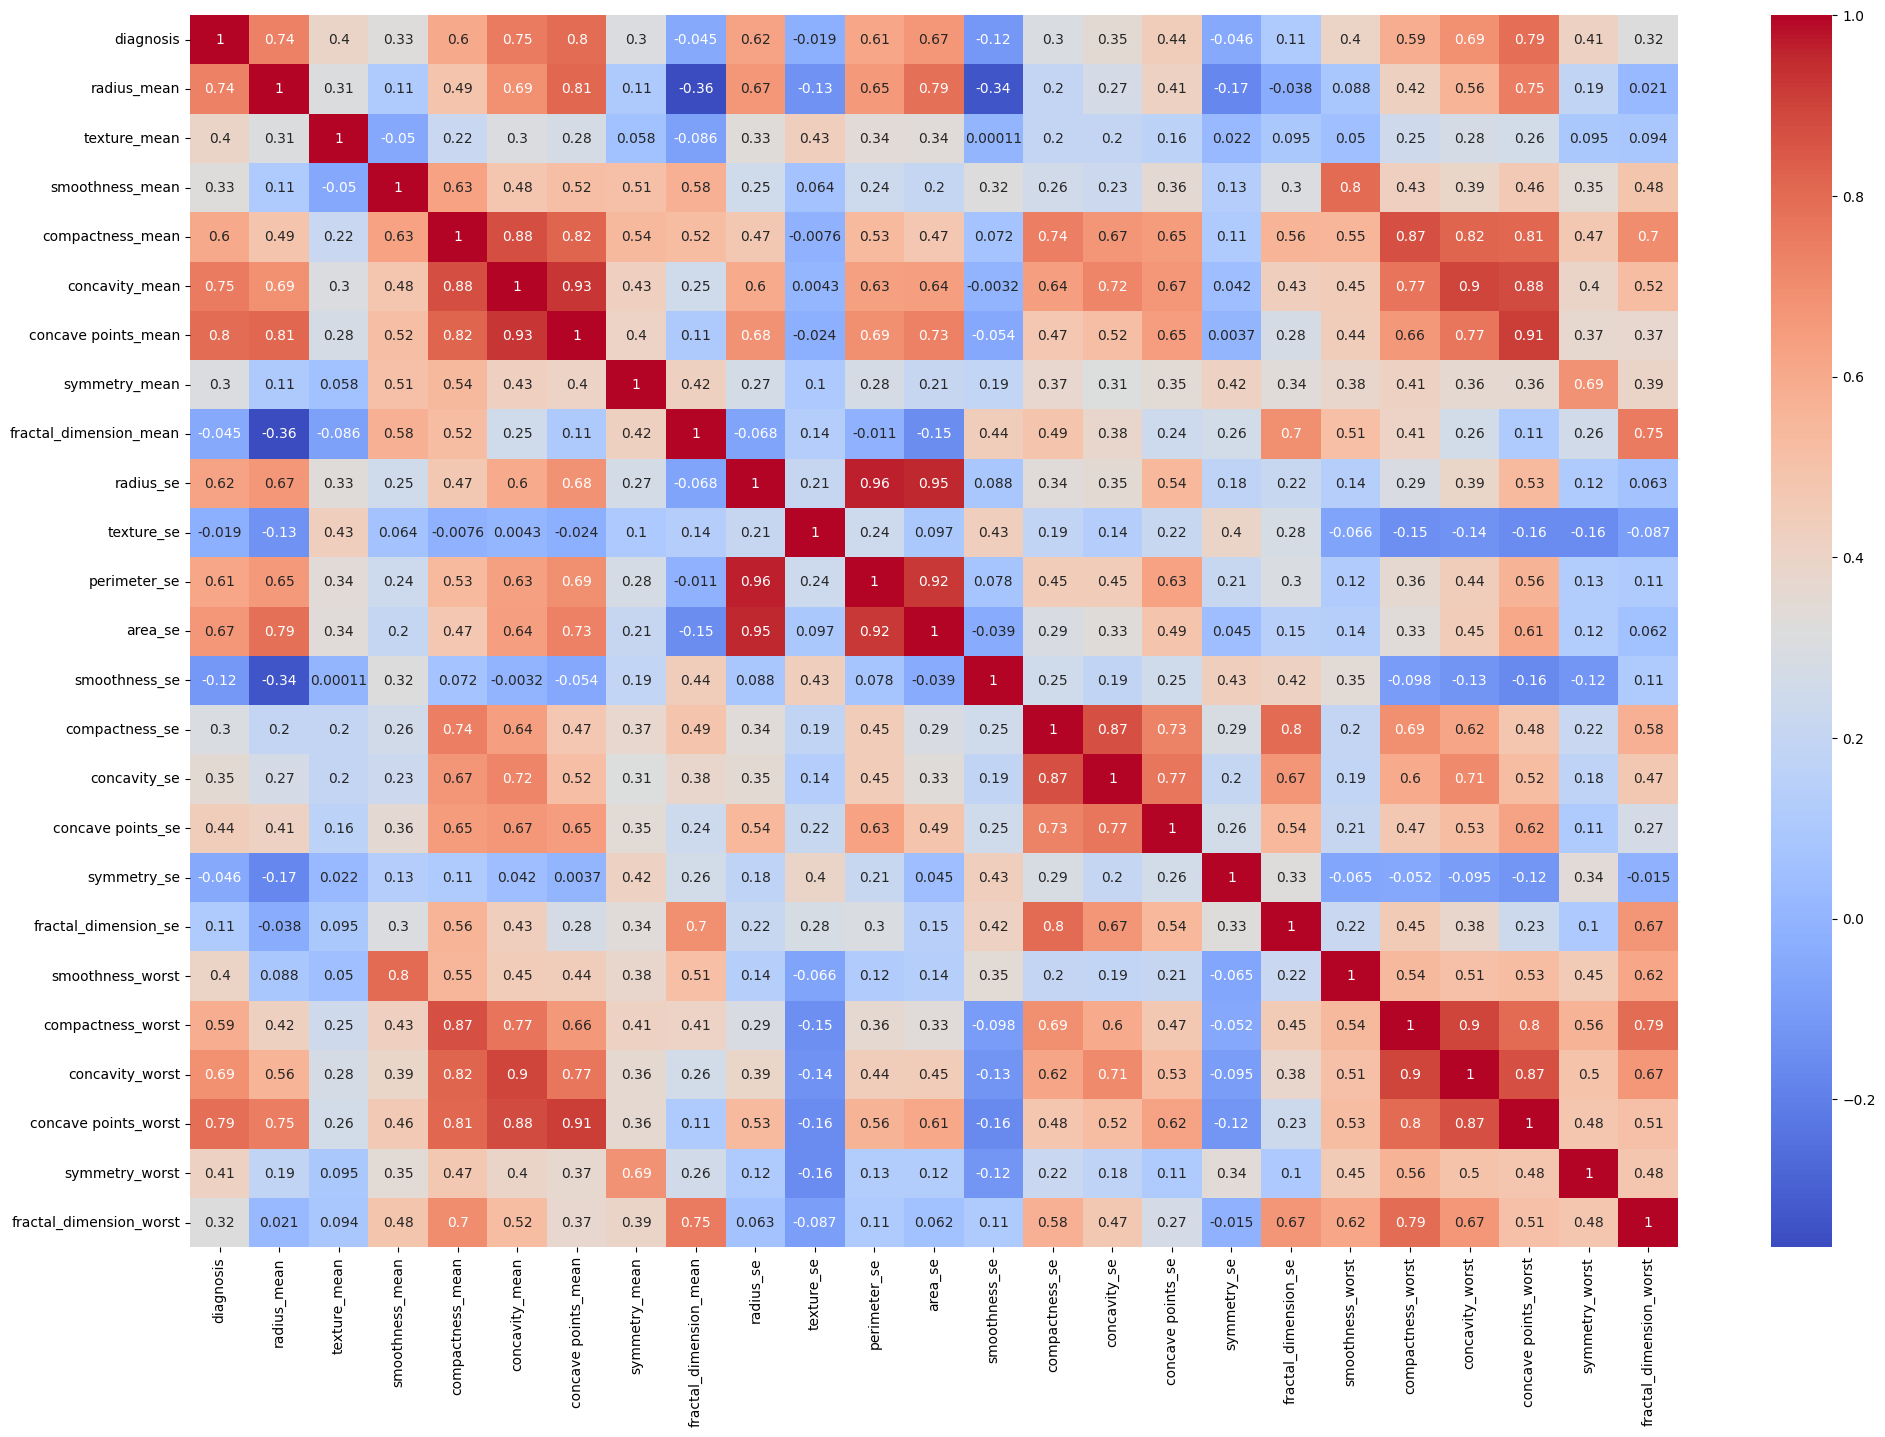

In [44]:
#new heatmap
plt.figure(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Modeling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
X = df.drop(['diagnosis'], axis=1) 
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

_Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=3000, random_state=42, class_weight='balanced')  
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.9722222222222222

Confusion Matrix:
 [[69  2]
 [ 1 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.97      0.96        37

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108



_KNN

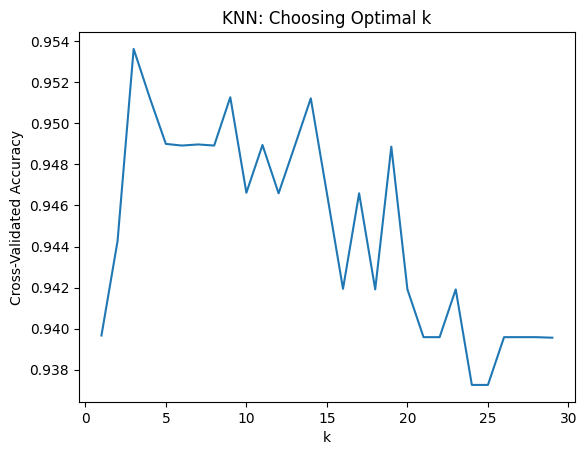

Optimal k: 3


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN and find optimal k 
k_values = list(range(1, 30))  
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs k 
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Choosing Optimal k')
plt.show()

# Pick the best 
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal k: {optimal_k}")


In [50]:


# Train KNN with the best k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("\nKNN Results:")
print(f"Accuracy (k={optimal_k}):", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Results:
Accuracy (k=3): 0.9907407407407407

Confusion Matrix:
 [[71  0]
 [ 1 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.97      0.99        37

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



_Random Forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  
    max_depth=None,    
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  
)
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9815

Confusion Matrix:
 [[70  1]
 [ 1 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.97      0.97      0.97        37

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



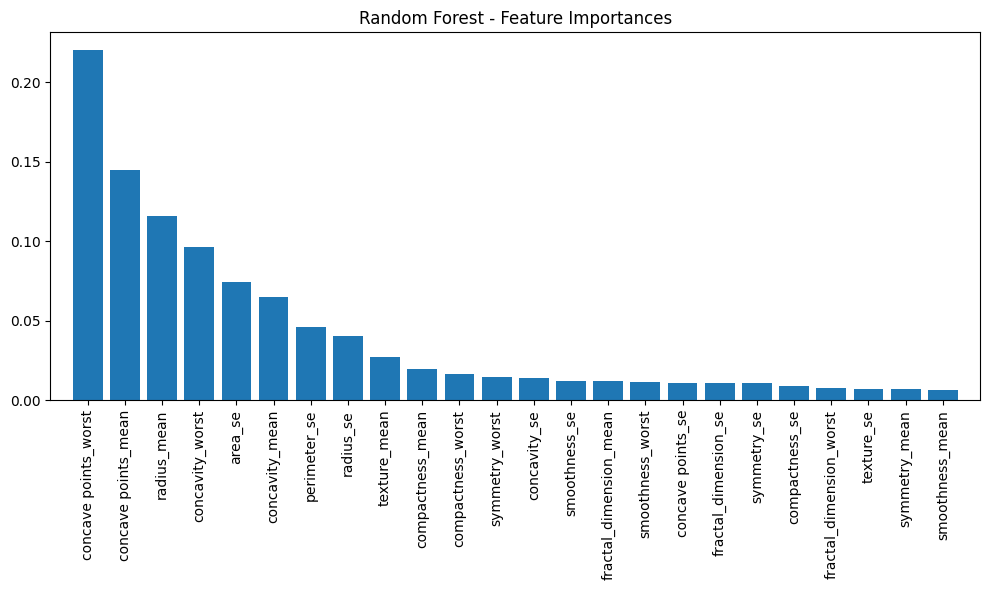

In [52]:
# Feature Importance Visualization
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]  

plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), 
        feature_importances[indices],
        align="center")
plt.xticks(range(X_train_scaled.shape[1]), 
           features[indices], 
           rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.tight_layout()
plt.show()

Moddel save

In [53]:
from joblib import dump  

dump(scaler, 'standard_scaler.joblib')      #Scaler
dump(logreg, 'logistic_regression.joblib')  #Logistic Regression
dump(knn, 'knn_model.joblib')               #KNN model
dump(rf, 'random_forest.joblib')            #Random Forest

['random_forest.joblib']